# 주식시장 분석 

- 2012-1-1 ~ 2021-12-31 기간의 Tesla, FORD, Apple 의 주가 등락, 변동성, 수익률 비교  


In [1]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import warnings
warnings.filterwarnings("ignore")

## yfinance 를 이용한 주가 data 가져오기

In [2]:
start = datetime.datetime(2012, 1, 1)
end = datetime.datetime(2022, 7, 31)

tesla_t = yf.Ticker('TSLA')
tesla = tesla_t.history(start=start, end=end)
tesla = tesla[['Close', 'Volume']]

In [3]:
apple_t = yf.Ticker('AAPL')
apple = apple_t.history(start=start, end=end)
apple = apple[['Close', 'Volume']]

In [4]:
ford_t = yf.Ticker("F")
ford = ford_t.history(start=start, end=end)
ford = ford[['Close', 'Volume']]

## 주가 추이 시각화

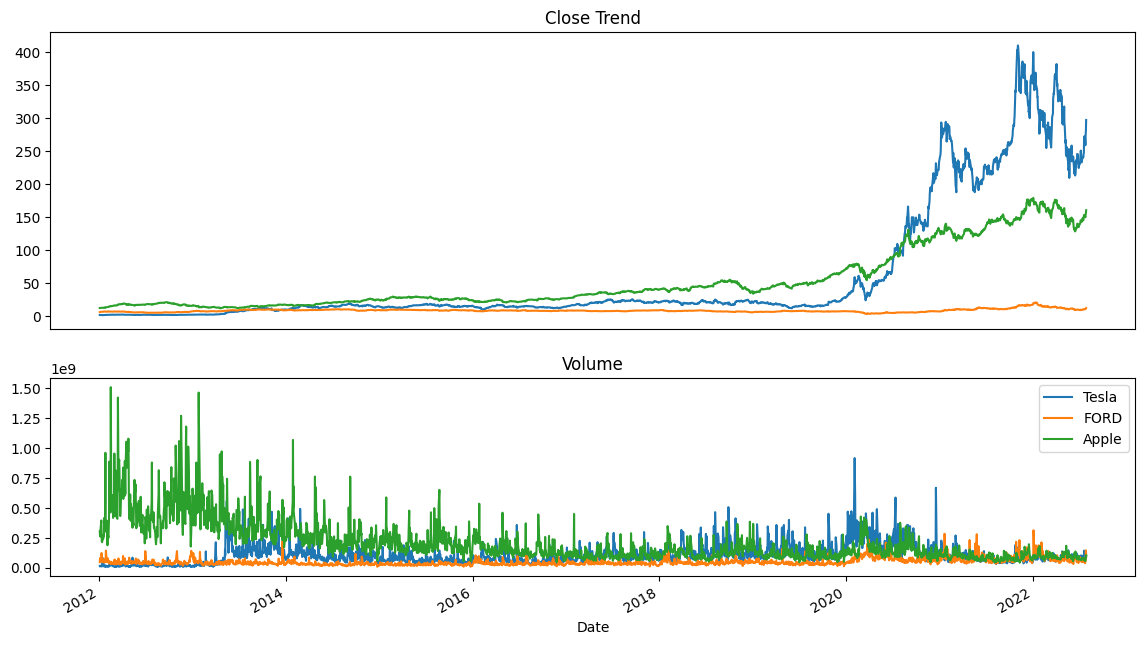

In [5]:
from matplotlib import gridspec

# Figure 크기를 10x8로 설정하고, 그리드 구조(GridSpec)를 사용하여 서브플롯을 구성
# 첫 번째 플롯은 높이 비율을 3으로, 두 번째 플롯은 높이 비율을 2로 설정하여 2개의 서브플롯을 만듭니다.
fig = plt.figure(figsize=(10, 8))
gs = gridspec.GridSpec(2, 1, height_ratios=[3, 2]) 

# 서브플롯을 리스트에 추가합니다.
axes = []
axes.append(plt.subplot(gs[0]))  # 첫 번째 서브플롯
axes.append(plt.subplot(gs[1]))  # 두 번째 서브플롯

# 첫 번째 서브플롯의 x축(날짜 레이블)을 숨깁니다.
axes[0].get_xaxis().set_visible(False)

# 첫 번째 서브플롯에 테슬라(Tesla), 포드(FORD), 애플(Apple)의 종가 데이터를 플로팅합니다.
# 각 주식의 'Close'(종가) 열을 플로팅하고, 제목을 "Close Trend"로 설정합니다.
tesla['Close'].plot(ax=axes[0], label='Tesla', figsize=(14, 8), title="Close Trend")
ford['Close'].plot(ax=axes[0], label='FORD')
apple['Close'].plot(ax=axes[0], label='Apple')

# 두 번째 서브플롯에 테슬라(Tesla), 포드(FORD), 애플(Apple)의 거래량 데이터를 플로팅합니다.
# 각 주식의 'Volume'(거래량) 열을 플로팅하고, 제목을 "Volume"으로 설정합니다.
tesla['Volume'].plot(ax=axes[1], label='Tesla', figsize=(14, 8), title="Volume")
ford['Volume'].plot(ax=axes[1], label='FORD')
apple['Volume'].plot(ax=axes[1], label='Apple')

# 범례(legend)를 추가하여 플롯에 표시된 라인들을 구분할 수 있도록 합니다.
plt.legend()
plt.show()

**최대 거래량 발생 일자**

In [6]:
apple

,Close,Volume
Date,,
2012-01-03 00:00:00-05:00,12.402627,302220800
2012-01-04 00:00:00-05:00,12.469280,260022000
2012-01-05 00:00:00-05:00,12.607716,271269600
2012-01-06 00:00:00-05:00,12.739511,318292800
2012-01-09 00:00:00-05:00,12.719303,394024400
...,...,...
2022-07-25 00:00:00-04:00,151.064072,53623900
2022-07-26 00:00:00-04:00,149.730698,55138700
2022-07-27 00:00:00-04:00,154.856720,78620700


In [7]:
# 각 주식의 거래량(Volume) 데이터에서 거래량이 가장 많았던 날의 실제 날짜를 반환합니다.
# idxmax() 함수는 가장 큰 값의 위치에 해당하는 인덱스를 반환하며, 이 인덱스는 실제 날짜를 나타냅니다.
apple['Volume'].idxmax(), tesla['Volume'].idxmax(), ford['Volume'].idxmax()

(Timestamp('2012-02-15 00:00:00-0500', tz='America/New_York'),
 Timestamp('2020-02-04 00:00:00-0500', tz='America/New_York'),
 Timestamp('2022-01-04 00:00:00-0500', tz='America/New_York'))

## Log Close Price
- 서로 scale 이 다른 주가에 대한 실제 변화율을 시각화 하기 위해 price 의 log 를 취함

In [8]:
# 테슬라(Tesla) 주식의 'Close' 열을 로그 값으로 변환하여 'log close' 열에 저장합니다.
tesla['log close'] = np.log(tesla['Close'])

# 포드(Ford) 주식의 'Close' 열을 로그 값으로 변환하여 'log close' 열에 저장합니다.
ford['log close'] = np.log(ford['Close'])

# 애플(Apple) 주식의 'Close' 열을 로그 값으로 변환하여 'log close' 열에 저장합니다.
apple['log close'] = np.log(apple['Close'])

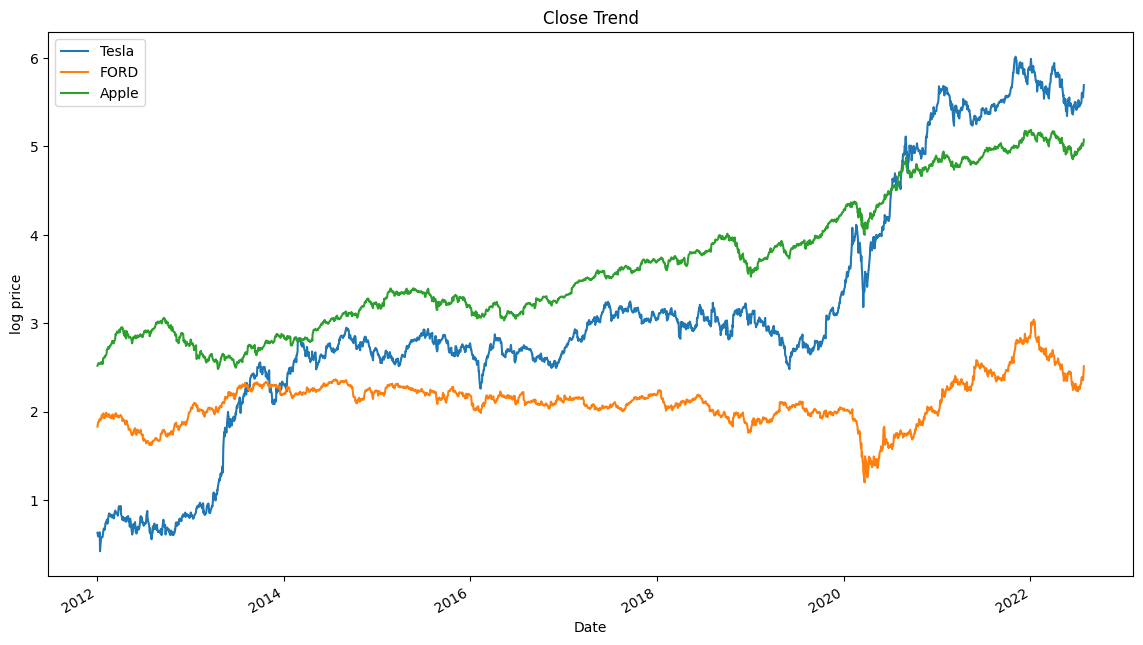

In [9]:
# Figure 크기를 10x8로 설정하고 서브플롯을 생성합니다.
fig = plt.figure(figsize=(10, 8))
ax1 = plt.subplot()

# 테슬라(Tesla)의 로그 변환된 종가('log close') 데이터를 플로팅합니다.
# ax1은 서브플롯을 지정하며, label은 'Tesla', 제목은 "Close Trend"로 설정합니다.
tesla['log close'].plot(ax=ax1, label='Tesla', figsize=(14, 8), title="Close Trend")

# 포드(Ford)의 로그 변환된 종가('log close') 데이터를 플로팅합니다.
ford['log close'].plot(ax=ax1, label='FORD')

# 애플(Apple)의 로그 변환된 종가('log close') 데이터를 플로팅합니다.
apple['log close'].plot(ax=ax1, label='Apple')

# y축 레이블을 'log price'로 설정합니다.
plt.ylabel('log price')

plt.legend()
plt.show()

## Normalized Price

- 시초가를 1 로 맞추어 놓고 변화된 상대 가격 비교

In [10]:
# 테슬라(Tesla)의 종가를 첫 번째 날의 종가로 나누어 정규화한 값을 'norm close' 열에 저장합니다.
tesla['norm close'] = tesla['Close'] / tesla['Close'][0] 

# 포드(Ford)의 종가를 첫 번째 날의 종가로 나누어 정규화한 값을 'norm close' 열에 저장합니다.
ford['norm close'] = ford['Close'] / ford['Close'][0]

# 애플(Apple)의 종가를 첫 번째 날의 종가로 나누어 정규화한 값을 'norm close' 열에 저장합니다.
apple['norm close'] = apple['Close'] / apple['Close'][0]

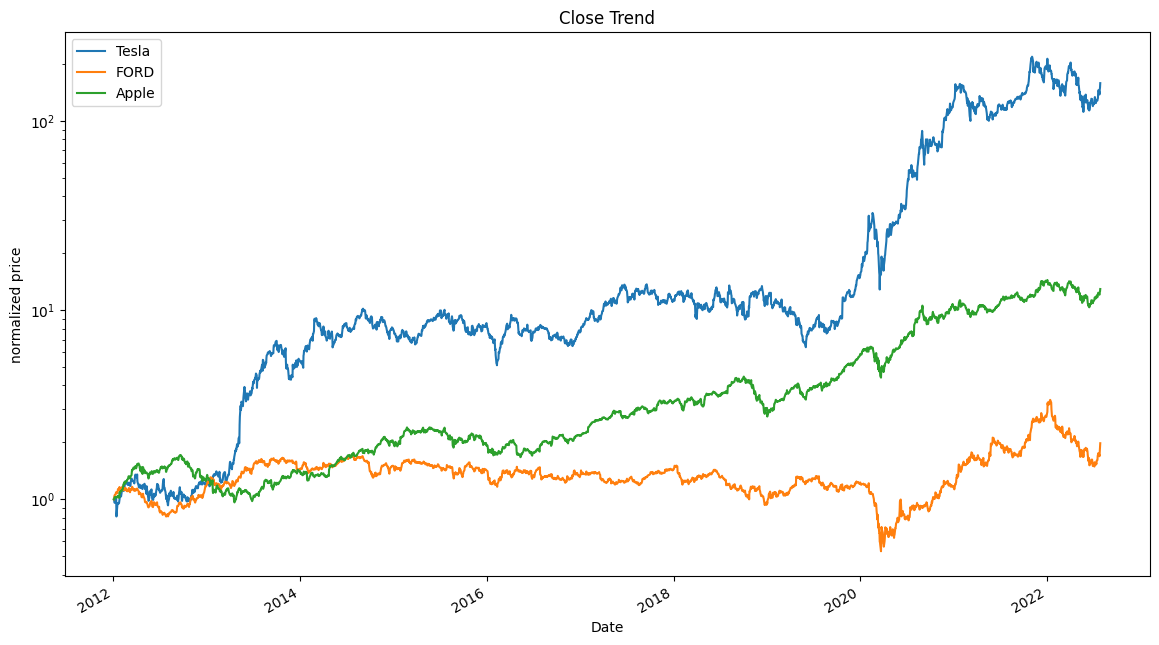

In [11]:
# 그림의 크기를 (10, 8)로 설정합니다.
fig = plt.figure(figsize=(10, 8))

# 서브플롯을 생성합니다.
ax1 = plt.subplot()

# y축의 스케일을 로그 스케일로 설정합니다.
ax1.set_yscale('log')

# 테슬라(Tesla)의 정규화된 종가를 플롯합니다.
tesla['norm close'].plot(ax=ax1, label='Tesla', figsize=(14, 8), title="Close Trend")

# 포드(Ford)의 정규화된 종가를 플롯합니다.
ford['norm close'].plot(ax=ax1, label='FORD')

# 애플(Apple)의 정규화된 종가를 플롯합니다.
apple['norm close'].plot(ax=ax1, label='Apple')

plt.ylabel('normalized price')
plt.legend()
plt.show()

## 주식 종목간의 correlation 분석

- Tesla 주식이  Apple 과 관련 있는지, GM 과 관련 있는지 분석

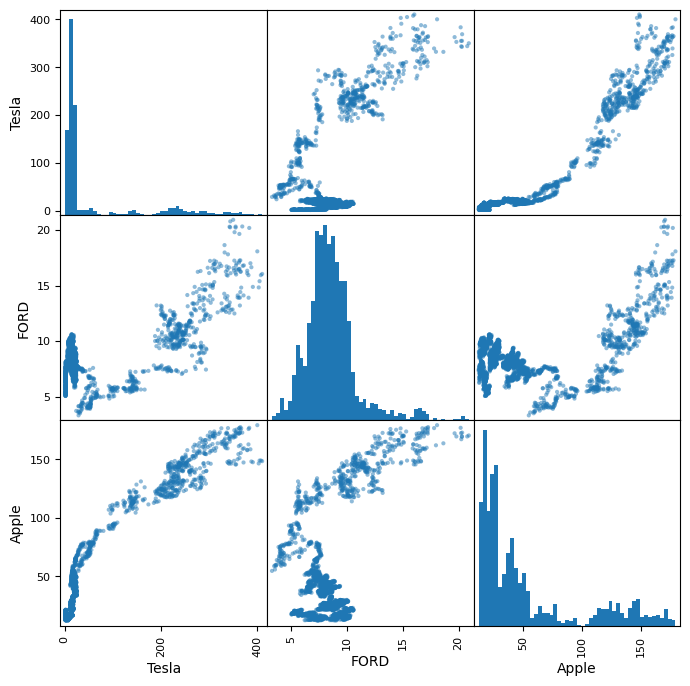

In [12]:
from pandas.plotting import scatter_matrix

# Tesla, Ford, Apple의 종가를 열로 가지는 데이터프레임을 생성합니다.
df = pd.concat([tesla['Close'], ford['Close'], apple['Close']], axis=1)

# 열 이름을 'Tesla', 'FORD', 'Apple'로 설정합니다.
df.columns = ['Tesla', 'FORD', 'Apple']

# 산점도 행렬을 생성하여 데이터프레임의 상관관계를 시각화합니다.
# 각 변수의 히스토그램을 50개의 구간으로 나누어 표시합니다.
scatter_matrix(df, figsize=(8, 8), hist_kwds={'bins': 50});

In [13]:
df.corr()

,Tesla,FORD,Apple
Tesla,1.000000,0.645409,0.951569
FORD,0.645409,1.000000,0.495228
Apple,0.951569,0.495228,1.000000


## 일일 수익율 (Daily Percentage Change)

- 주식을 구입하고 다음 날 팔았을 때의 이득 (손실)

- 주식의 변동성 분석에 유용

- 일일 수익율의 분포가 넓으면 변동성 큼

$r_t = \frac{P_t}{P_{t-1}} - 1$ 

$수익(율) = \frac{당일가격}{전일가격} - 1$

```
tesla['return'] = tesla['Close'] / tesla['Close'].shift(1) - 1
tesla['return'] = tesla['Close'].pct_change(1)  
```

- histogram 으로 얼마나 넓게 분포하는지 check

In [14]:
# Tesla, Ford, Apple의 일일 수익률을 계산합니다.

# Tesla의 수익률: 현재 종가를 이전 종가로 나누고 1을 빼서 계산합니다.
tesla['return'] = tesla['Close'] / tesla['Close'].shift(1) - 1

# Ford의 수익률: pandas의 pct_change()를 사용하여 계산합니다.
ford['return'] = ford['Close'].pct_change(1)

# Apple의 수익률: pandas의 pct_change()를 사용하여 계산합니다.
apple['return'] = apple['Close'].pct_change(1)

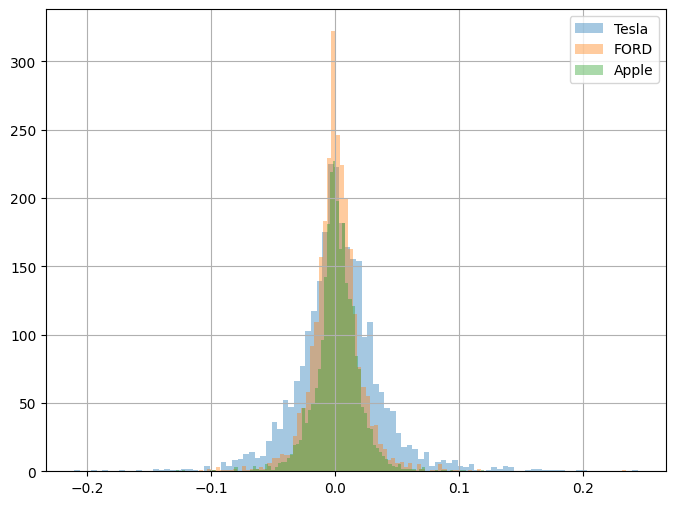

In [15]:
# Tesla, Ford, Apple의 수익률 분포를 히스토그램으로 시각화합니다.

# Tesla의 수익률 히스토그램을 생성합니다. 
# 100개의 구간으로 나누고, 투명도를 설정하여 겹쳐 보이도록 합니다.
tesla['return'].hist(bins=100, label='Tesla', alpha=0.4, figsize=(8, 6));

# Ford의 수익률 히스토그램을 생성합니다. 
# 100개의 구간으로 나누고, 투명도를 설정하여 겹쳐 보이도록 합니다.
ford['return'].hist(bins=100, label='FORD', alpha=0.4);

# Apple의 수익률 히스토그램을 생성합니다. 
# 100개의 구간으로 나누고, 투명도를 설정하여 겹쳐 보이도록 합니다.
apple['return'].hist(bins=100, label='Apple', alpha=0.4);

plt.legend();
plt.show()

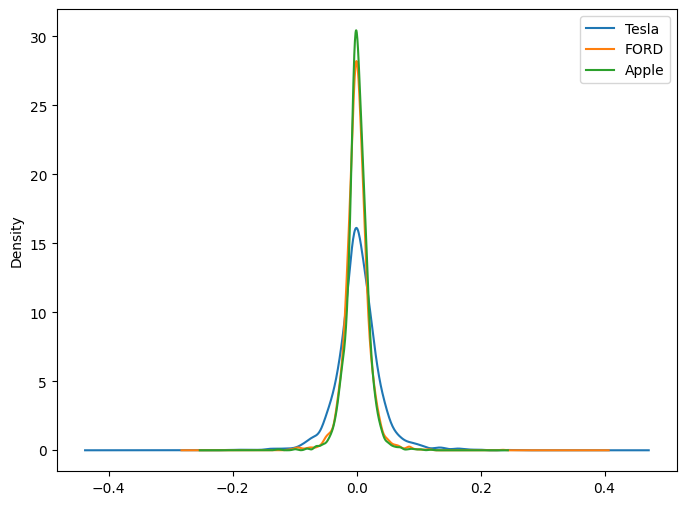

In [16]:
# Tesla, Ford, Apple의 수익률 분포를 커널 밀도 추정(KDE)으로 시각화합니다.

# Tesla의 수익률 분포를 KDE로 시각화합니다.
# 그래프의 크기를 (8, 6)으로 설정합니다.
tesla['return'].plot(kind='kde', label='Tesla', figsize=(8, 6));

# Ford의 수익률 분포를 KDE로 시각화합니다.
ford['return'].plot(kind='kde', label='FORD');

# Apple의 수익률 분포를 KDE로 시각화합니다.
apple['return'].plot(kind='kde', label='Apple');

plt.legend();
plt.show()

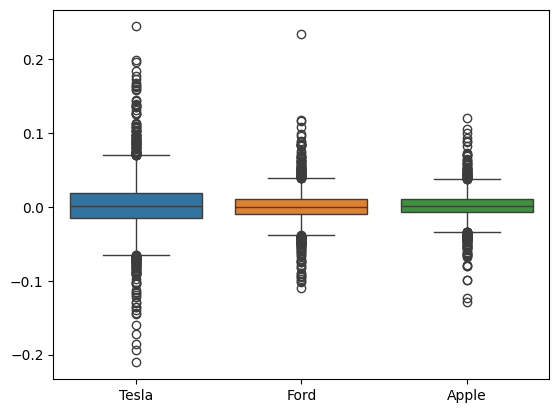

In [17]:
import seaborn as sns

# Tesla, Ford, Apple의 수익률 데이터를 데이터프레임으로 결합합니다.
df = pd.concat([tesla['return'], ford['return'], apple['return']], axis=1)
df.columns = ['Tesla', 'Ford', 'Apple']

# Seaborn의 boxplot을 사용하여 수익률의 박스 플롯을 시각화합니다.
# 각 회사의 수익률 분포를 박스 플롯으로 비교합니다.
sns.boxplot(data=df);

## 누적일일수익률 (Cumulative Daily Returns)

- 1 불을 투자했을 때 누적적으로 가장 수익이 많이 났을 주식 파악

$i_t = (1+r_t) * i_{t-1}$  


$누적수익률 = (1 + 당일수익률) * 전일자 누적수익률$

In [18]:
# Tesla, Ford, Apple의 누적 수익률을 계산합니다.
# 수익률을 1에 더하고 누적 곱셈(cumprod)을 통해 누적 수익률을 구합니다.
tesla['cum ret'] = (1 + tesla['return']).cumprod()
ford['cum ret'] = (1 + ford['return']).cumprod()
apple['cum ret'] = (1 + apple['return']).cumprod()

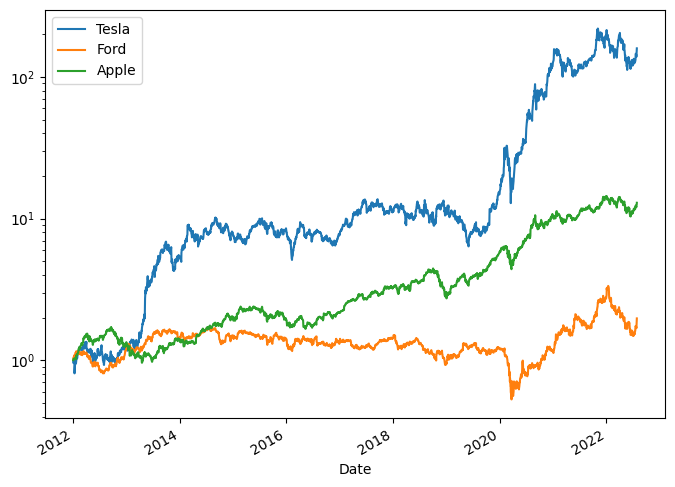

In [19]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_yscale('log')  # y축을 로그 스케일로 설정

# 각 회사의 누적 수익률을 로그 스케일로 플로팅합니다.
tesla['cum ret'].plot(label='Tesla', figsize=(8, 6), ax=ax)
ford['cum ret'].plot(label='Ford', ax=ax)
apple['cum ret'].plot(label='Apple', ax=ax)
plt.legend()  # 범례를 추가
plt.show()

In [20]:
# Tesla 데이터프레임에서 첫 번째와 마지막 행을 선택합니다.
tesla.iloc[[0, -1]]

,Close,Volume,log close,norm close,return,cum ret
Date,,,,,,
2012-01-03 00:00:00-05:00,1.872000,13921500,0.627007,1.000000,NaN,NaN
2022-07-29 00:00:00-04:00,297.149994,95313000,5.694237,158.733973,0.05785,158.733973


In [21]:
apple.iloc[[0, -1]]

,Close,Volume,log close,norm close,return,cum ret
Date,,,,,,
2012-01-03 00:00:00-05:00,12.402627,302220800,2.517908,1.000000,NaN,NaN
2022-07-29 00:00:00-04:00,160.506195,101786900,5.078333,12.941306,0.032793,12.941306


In [22]:
ford.iloc[[0, -1]]

,Close,Volume,log close,norm close,return,cum ret
Date,,,,,,
2012-01-03 00:00:00-05:00,6.232307,45709900,1.829747,1.000000,NaN,NaN
2022-07-29 00:00:00-04:00,12.339985,94551600,2.512845,1.980003,0.049286,1.980003
